In [ ]:
# 1. Escolher a base de dados
# desmatamento_prodes.csv
#Objetivo: Analisar a evolução do desmatamento nos estados da Amazônia Legal brasileira ao longo de 35 anos.


In [6]:
# Importando as bibliotecas
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de exibição
import warnings
warnings.filterwarnings('ignore')  # Evita avisos desnecessários
plt.style.use('seaborn-v0_8')      # Estilo visual dos gráficos
sns.set_palette('Set2')            # Paleta de cores agradável 

print("Tudo funcionando!")

Tudo funcionando!


In [7]:
# 2. Carregar a base de dados
df_desmatamento = pd.read_csv(r"C:\\Users\\shara\\OneDrive\\Área de Trabalho\\ESTUDOS - SHARANA\DATA ANALYTICS\\03 MODULO\\desafio final de modulo\\desmatamento_prodes.csv")

# Visualizar as 5 primeiras linhas
print(df_desmatamento.head())

   referencia  acre  amazonas  amapa  maranhao  mato_grosso  para  rondonia  \
0        1988   620      1510     60      2450         5140  6990      2340   
1        1989   540      1180    130      1420         5960  5750      1430   
2        1990   550       520    250      1100         4020  4890      1670   
3        1991   380       980    410       670         2840  3780      1110   
4        1992   400       799     36      1135         4674  3787      2265   

   roraima  tocantins  area_total_desmatamento  
0      290       1650                    21050  
1      630        730                    17770  
2      150        580                    13730  
3      420        440                    11030  
4      281        409                    13786  


In [8]:
# Ver info geral
print(df_desmatamento.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   referencia               35 non-null     int64
 1   acre                     35 non-null     int64
 2   amazonas                 35 non-null     int64
 3   amapa                    35 non-null     int64
 4   maranhao                 35 non-null     int64
 5   mato_grosso              35 non-null     int64
 6   para                     35 non-null     int64
 7   rondonia                 35 non-null     int64
 8   roraima                  35 non-null     int64
 9   tocantins                35 non-null     int64
 10  area_total_desmatamento  35 non-null     int64
dtypes: int64(11)
memory usage: 3.1 KB
None


In [9]:
# Estatísticas descritivas
print(df_desmatamento.describe())

        referencia         acre     amazonas       amapa     maranhao  \
count    35.000000    35.000000    35.000000   35.000000    35.000000   
mean   2005.000000   500.428571   954.200000   47.485714   753.857143   
std      10.246951   251.248329   547.907667   78.469691   502.825086   
min    1988.000000   167.000000   370.000000    0.000000   209.000000   
25%    1996.500000   307.000000   592.000000   13.000000   343.000000   
50%    2005.000000   441.000000   775.000000   25.000000   674.000000   
75%    2013.500000   606.000000  1154.500000   42.500000  1063.000000   
max    2022.000000  1208.000000  2607.000000  410.000000  2450.000000   

        mato_grosso         para     rondonia     roraima    tocantins  \
count     35.000000    35.000000    35.000000   35.000000    35.000000   
mean    4344.485714  4764.371429  1889.571429  261.400000   251.142857   
std     3074.753719  1771.290873  1000.094563  131.758514   319.975748   
min      757.000000  1741.000000   435.000000 

In [ ]:
# Análise das estatísticas descritivas

#Informações Gerais
#O conjunto de dados abrange 35 anos (de 1988 a 2022, conforme mostrado na coluna "referencia")

#Colunas Explicadas
#1. count - Mostra que há 35 registros para cada estado, o que confirma que temos dados completos para todo o período

#2. mean (Média) - Representa o valor médio de desmatamento anual em km²

# Estados com maiores médias:

#Pará: 4,764 km²/ano
#Mato Grosso: 4,344 km²/ano
#Rondônia: 1,890 km²/ano

#Estados com menores médias:

#Amapá: 47 km²/ano
#Tocantins: 251 km²/ano
#Roraima: 261 km²/ano

#3. std (Desvio Padrão) - Mede a variação dos dados em relação à média

#Estados com maior variação:

#Mato Grosso (3,075) - indica anos com valores muito acima e abaixo da média
#Pará (1,771)
#Amazonas (548)

#Estados com menor variação:

#Amapá (78)
#Roraima (132)

#4. min (Valor Mínimo) - Menor valor registrado no período

#Destaques:
#Tocantins teve um ano com apenas 23 km² desmatados
#Amapá teve um ano com 0 km² de desmatamento registrado


#5. max (Valor Máximo)
#Maior valor registrado no período

#Destaques:
#Mato Grosso atingiu 11,814 km² em seu pior ano
#Pará chegou a 8,870 km²
#Maranhão teve um pico de 2,450 km²

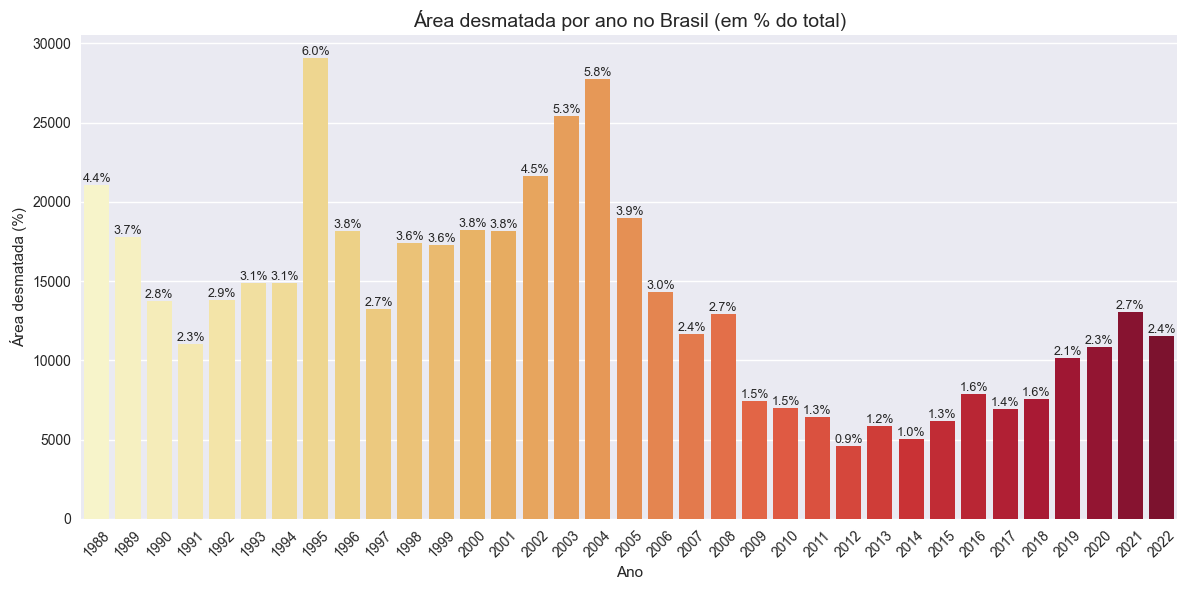

In [22]:
# Calcular o total geral de área desmatada
total_desmatado = df_desmatamento['area_total_desmatamento'].sum()

# Gráfico: desmatamento por ano
plt.figure(figsize=(12,6))
ax = sns.barplot(x='referencia', y='area_total_desmatamento', data=df_desmatamento, palette='YlOrRd')

plt.title('Área desmatada por ano no Brasil (em % do total)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Área desmatada (%)')
plt.xticks(rotation=45)

# Adicionar valores como porcentagem no topo de cada barra
for barra in ax.patches:
    valor = barra.get_height()
    porcentagem = (valor / total_desmatado) * 100
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        valor + 0.1,
        f'{porcentagem:.1f}%',
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()


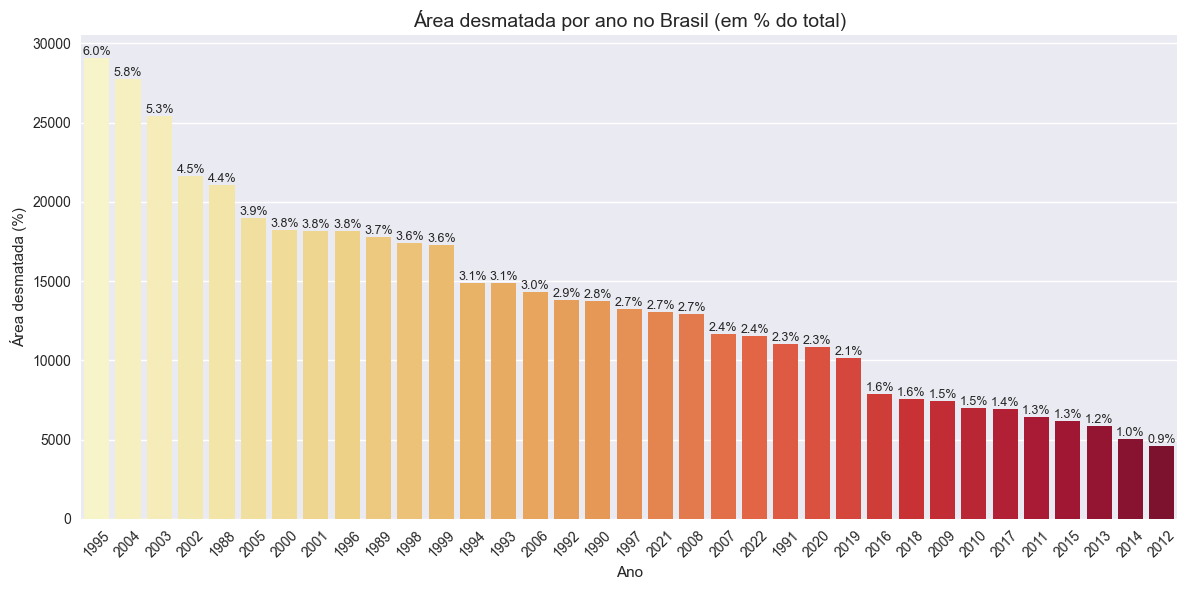

In [26]:
# Calcular o total geral de área desmatada
total_desmatado = df_desmatamento['area_total_desmatamento'].sum()

# Calcular a porcentagem de desmatamento por ano
df_desmatamento['porcentagem'] = (df_desmatamento['area_total_desmatamento'] / total_desmatado) * 100

# Ordenar os dados de maneira decrescente pela área total de desmatamento
df_desmatamento_sorted = df_desmatamento.sort_values(by='area_total_desmatamento', ascending=False)

# Gráfico: desmatamento por ano
plt.figure(figsize=(12,6))
ax = sns.barplot(x='referencia', y='area_total_desmatamento', data=df_desmatamento_sorted, palette='YlOrRd', 
                 order=df_desmatamento_sorted['referencia'])

plt.title('Área desmatada por ano no Brasil (em % do total)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Área desmatada (%)')
plt.xticks(rotation=45)

# Adicionar valores como porcentagem no topo de cada barra
for barra in ax.patches:
    valor = barra.get_height()
    porcentagem = (valor / total_desmatado) * 100
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        valor + 0.1,
        f'{porcentagem:.1f}%',
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()


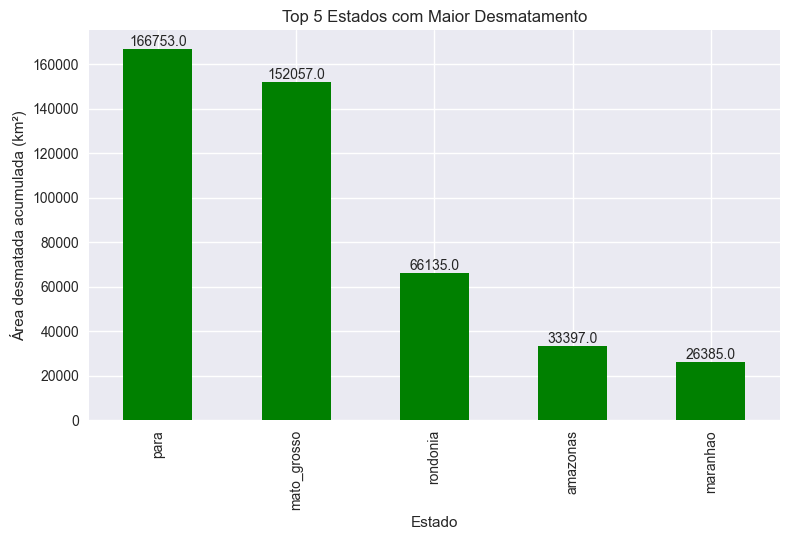

In [20]:
# Remover colunas que não representam estados
somas = df_desmatamento.drop(columns=['referencia', 'area_total_desmatamento']).sum().sort_values(ascending=False)

# Top 5 estados com maior desmatamento
top5_maior = somas.head(5)

ax = top5_maior.plot(kind='bar', color='green')
plt.title('Top 5 Estados com Maior Desmatamento')
plt.ylabel('Área desmatada acumulada (km²)')
plt.xlabel('Estado')

# Adicionar valores nas barras
for barra in ax.patches:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 0.1, f'{altura:.1f}', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


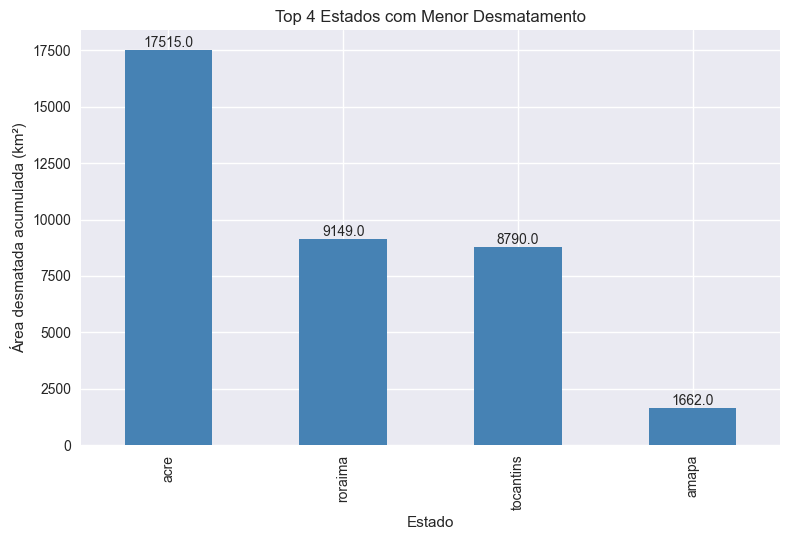

In [19]:
# Top 4 menores
ax = somas.tail(4).plot(kind='bar', color='steelblue')
plt.title('Top 4 Estados com Menor Desmatamento')
plt.ylabel('Área desmatada acumulada (km²)')
plt.xlabel('Estado')

# Adicionar valores nas barras
for barra in ax.patches:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 0.1, f'{altura:.1f}', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [43]:
print("Desmatamento em Ordem Decrescente:")
print(somas.head(10))

Desmatamento em Ordem Decrescente:
para           166753
mato_grosso    152057
rondonia        66135
amazonas        33397
maranhao        26385
acre            17515
roraima          9149
tocantins        8790
amapa            1662
dtype: int64


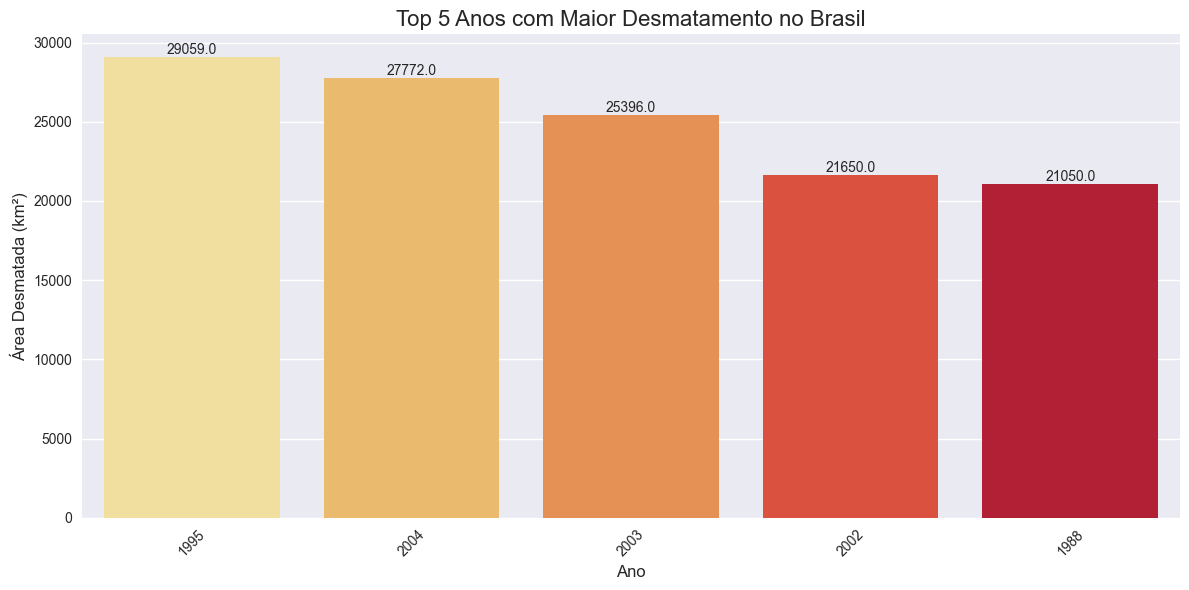

In [18]:
# 5 anos com maiores índices de desmatamento
top5_maiores_anos = df_desmatamento.nlargest(5, 'area_total_desmatamento')

# Ordenar explicitamente os anos do maior para o menor desmatamento
ordem_anos = top5_maiores_anos.sort_values('area_total_desmatamento', ascending=False)['referencia']

# Gráfico: 5 anos com maiores desmatamentos
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x='referencia',
    y='area_total_desmatamento',
    data=top5_maiores_anos,
    order=ordem_anos,
    palette='YlOrRd'
)

# Adicionar rótulos no topo de cada barra
for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,  # posição X central da barra
        altura + 0.1,                         # posição Y um pouco acima da barra
        f'{altura:.1f}',                      # valor com 1 casa decimal
        ha='center', va='bottom', fontsize=10
    )

# Título do gráfico
plt.title('Top 5 Anos com Maior Desmatamento no Brasil', fontsize=16)

# Rótulos dos eixos
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Área Desmatada (km²)', fontsize=12)

# Ajustar rotação dos rótulos do eixo X para maior legibilidade
plt.xticks(rotation=45)

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()





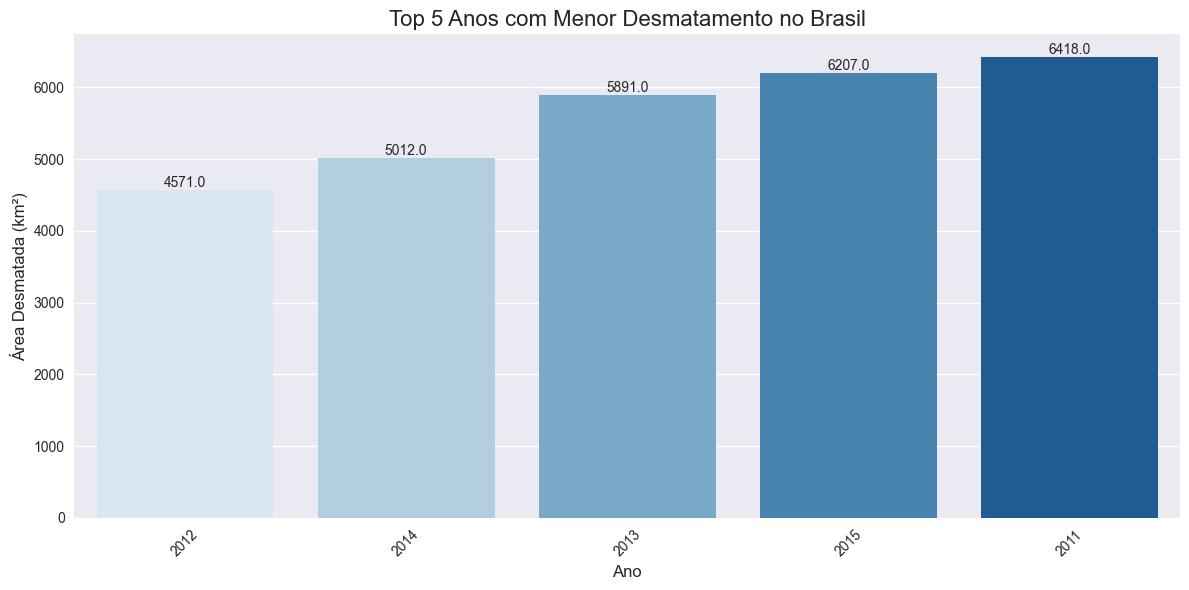

In [15]:
# 5 anos com menores índices de desmatamento
top5_menores_anos = df_desmatamento.nsmallest(5, 'area_total_desmatamento')

# Ordenar explicitamente os anos do menor para o maior desmatamento (em ordem decrescente no gráfico)
ordem_anos_menores = top5_menores_anos.sort_values('area_total_desmatamento', ascending=False)['referencia']

import matplotlib.pyplot as plt
import seaborn as sns

# 5 anos com menores índices de desmatamento
top5_menores_anos = df_desmatamento.nsmallest(5, 'area_total_desmatamento')

# Ordenar explicitamente os anos do menor para o maior desmatamento
top5_menores_anos = top5_menores_anos.sort_values('area_total_desmatamento', ascending=True)
ordem_anos_menores = top5_menores_anos['referencia']

# Gráfico
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x='referencia',
    y='area_total_desmatamento',
    data=top5_menores_anos,
    order=ordem_anos_menores,
    palette='Blues'
)

# Adicionar rótulos no topo de cada barra
for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,  # posição X central da barra
        altura + 0.1,                         # posição Y um pouco acima da barra
        f'{altura:.1f}',                      # valor com 1 casa decimal
        ha='center', va='bottom', fontsize=10
    )

# Título e rótulos
plt.title('Top 5 Anos com Menor Desmatamento no Brasil', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Área Desmatada (km²)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


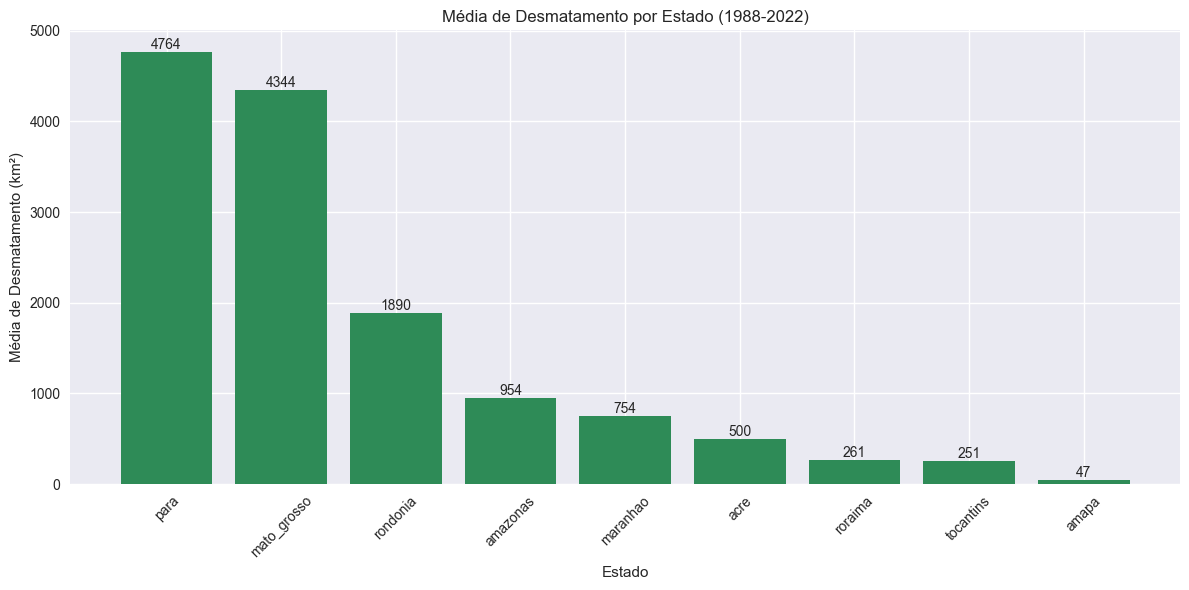

In [27]:
# Dados das médias (extraídos da tabela)
estados = ['acre', 'amazonas', 'amapa', 'maranhao', 'mato_grosso', 'para', 'rondonia', 'roraima', 'tocantins']
medias = [500.43, 954.20, 47.49, 753.86, 4344.49, 4764.37, 1889.57, 261.40, 251.14]

# Criar DataFrame
df_medias = pd.DataFrame({'Estado': estados, 'Média': medias})

# Ordenar por média
df_medias = df_medias.sort_values('Média', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(df_medias['Estado'], df_medias['Média'], color='#2e8b57')

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom')

plt.title('Média de Desmatamento por Estado (1988-2022)')
plt.xlabel('Estado')
plt.ylabel('Média de Desmatamento (km²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Análises e Possíveis Insights:

#Análise por Período e Fatores Influentes

#1988-1995:Crescimento contínuo do desmatamento

#Fatores:
#Expansão agropecuária acelerada
#Políticas de ocupação da Amazônia
#Fiscalização ambiental frágil
#Crise econômica levando a mais exploração de recursos naturais

#1996-1999: Queda inicial seguida de recuperação
#2000-2004: Novo crescimento até o segundo maior pico (27.772 km² em 2004)

#Fatores:

#Aumento dos preços de commodities agrícolas
#Expansão da soja e pecuária
#Fiscalização ainda insuficiente
#Efeitos do El Niño em alguns anos (secas intensas)

#2005-2012: Redução Significativa
#Queda de 83% entre 2004 (27.772 km²) e 2012 (4.571 km²)

#Fatores:

#Criação do PPCDAm (Plano de Ação para Prevenção e Controle do Desmatamento) em 2004
#Fortalecimento do IBAMA e operações de fiscalização
#Moratória da Soja (2006)
#Crise econômica global (2008) reduzindo demanda
#Políticas de comando e controle mais efetivas
#Aumento das áreas protegidas

#2013-2018: Estabilização Relativa
#Níveis médios entre 5.000-8.000 km²/ano

#Fatores:

#Manutenção parcial das políticas anteriores
#Pressão de mercados internacionais por sustentabilidade
#Algumas flexibilizações ambientais
#Eventos climáticos extremos (El Niño 2015-2016)

#2019-2022: Nova Ascensão - Aumento progressivo, atingindo 11.568 km² em 2022

#Fatores:

#Mudanças na política ambiental
#Redução da fiscalização
#Retrocessos na governança ambiental
#Aumento de queimadas (2019-2020)
#Pressão por expansão agrícola e minerária
#Pandemia de COVID-19 afetando fiscalização


#Pontos de Destaque

#Eficácia de Políticas Públicas: O período 2004-2012 demonstrou que ações coordenadas podem reduzir drasticamente o desmatamento.
#Correlação com Mercado: Períodos de alta nos preços de commodities tendem a aumentar a pressão por desmatamento.
#Importância da Fiscalização: Os dados mostram claramente a relação entre fiscalização ativa e redução de taxas.
#Vulnerabilidade a Mudanças Políticas: O recente aumento mostra como conquistas ambientais podem ser rapidamente perdidas.
#Mudanças Climáticas: Eventos como El Niño e secas prolongadas criam condições para aumento de queimadas e desmatamento.

#Conclusão

#Os dados revelam que o desmatamento na Amazônia é profundamente influenciado por uma combinação de fatores políticos, econômicos e climáticos.
#  Períodos de governança ambiental forte com fiscalização eficaz mostraram-se capazes de reduzir significativamente as taxas, enquanto 
# flexibilizações e incentivos econômicos à expansão agropecuária tendem a aumentar a pressão sobre a floresta. 
# A manutenção da floresta amazônica requer políticas consistentes, fiscalização eficiente e alternativas econômicas sustentáveis para as 
# populações locais.

#Fontes
# INPE/PRODES (Dados oficiais de desmatamento).
# IPAM (Análises sobre pressões na Amazônia).
# Imazon (Monitoramento independente).
# Observatório do Clima (Relatórios sobre políticas ambientais).
# Ministério do Meio Ambiente (histórico de políticas).
